# Test Agent on Basic Environment

## Step 1: Import the libraries

In [1]:
import time
import random
import math
from collections import deque

import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt
import torch

from gym_unity.envs import UnityEnv

In [2]:
from dqn_agent import DQNAgent
from model import DQNLinear

## Step 2: Create our environment

Initialize the environment in the code cell below.


In [3]:
ENV_PATH = '../unity_envs/Basic/'
ENV_NAME = 'Unity Environment'
env = UnityEnv(ENV_PATH + ENV_NAME, worker_id=0)

INFO:mlagents_envs:Connected new brain:
Basic?team=0
INFO:gym_unity:1 agents within environment.


In [4]:
# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device: ", device)

Device:  cuda


## Step 3: Creating our Agent

In [5]:
STATE_SIZE = env.observation_space.shape[0]
ACTION_SIZE = 3
GAMMA = 0.99           # discount factor
BUFFER_SIZE = int(1e5)      # replay buffer size
BATCH_SIZE = 32        # Update batch size
LR = 1e-3              # learning rate 
TAU = 1e-2             # for soft update of target parameters
UPDATE_EVERY = 5       # how often to update the network 

agent = DQNAgent(STATE_SIZE, ACTION_SIZE, BUFFER_SIZE, BATCH_SIZE, GAMMA, LR, TAU, UPDATE_EVERY, device)
scores = agent.load_model("basic_solved.pth")

In [6]:
def plot_result(scores):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

## Step 4: Testing the Agent

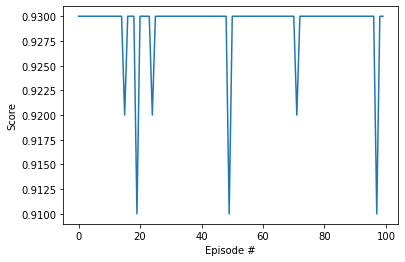

INFO:mlagents_envs:Environment shut down with return code 0 (CTRL_C_EVENT).


In [7]:
test_scores = []
for episode in range(100):
    episode_rewards = 0
    state = env.reset()
    while True:
        action = agent.act(state)
        state, reward, done, _ = env.step(action)
        episode_rewards += reward
        if done:
            break
    test_scores.append(episode_rewards)
    clear_output(wait=True)
    plot_result(test_scores)
env.close()